In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
f=open('SFE_Test_Data.txt','r')
SFE_testf=f.read()
f.close

f=open('SFE_Train_Data.txt','r')
SFE_trainf=f.read()
f.close

<function TextIOWrapper.close()>

In [54]:
def list_concat(word):
    out=''
    for i in word:
        out+=i
    return(out)

In [55]:
temp=[]
SFE_train=[]
for t in SFE_trainf:
    if(t!='\n' and t!='\t'):
        temp.append(t)
    else:
        SFE_train.append(temp)
        temp=[]
temp=[]
SFE_test=[]
for t in SFE_testf:
    if(t!='\n' and t!='\t'):
        temp.append(t)
    else:
        SFE_test.append(temp)
        temp=[]

In [56]:
SFE_train1=[]
for i in SFE_train:
    SFE_train1.append(list_concat(i))
SFE_test1=[]
for i in SFE_test:
    SFE_test1.append(list_concat(i))

In [57]:
cols=SFE_train1[0:8]
train=SFE_train1[8:len(SFE_train1)]

cols=SFE_test1[0:8]
test=SFE_test1[8:len(SFE_test1)]

In [58]:
train3=[]
for i in train:
    if (i=='High'):
        train3.append(float(1))
    elif (i=='Low'):
        train3.append(float(0))
    else:
        train3.append(float(i))
        
test3=[]
for i in test:
    if (i=='High'):
        test3.append(float(1))
    elif (i=='Low'):
        test3.append(float(0))
    else:
        test3.append(float(i))

In [59]:
train1=np.array(train3)
test1=np.array(test3)

In [60]:
train4=np.reshape(train1,(25,8))
test4=np.reshape(test1,(int(len(test1)/8),8))

In [61]:
len(test1)/8

98.0

In [62]:
traindf=pd.DataFrame(data=train4,columns=cols)
testdf=pd.DataFrame(data=test4,columns=cols)

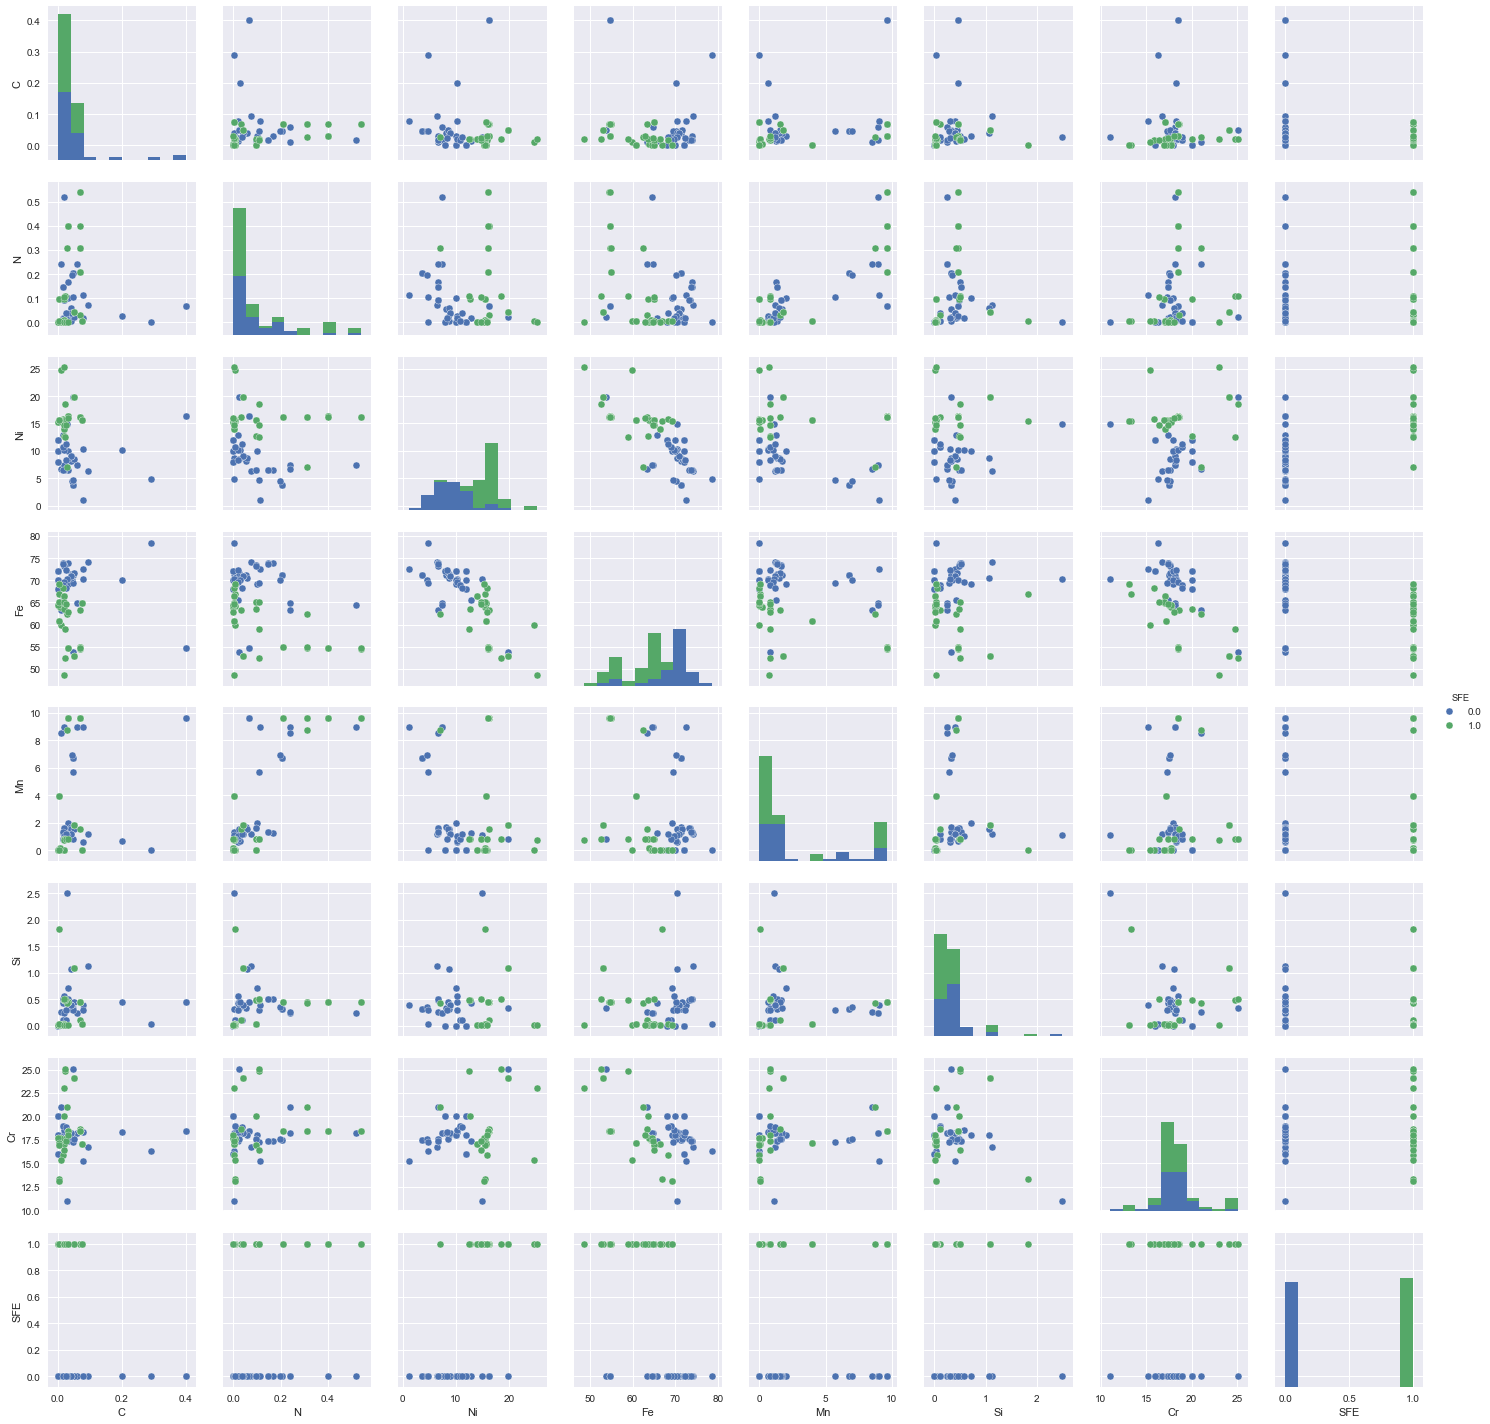

In [244]:
testdf
#scatterplot
sns.set()
sns.pairplot(testdf, size = 2.5,hue='SFE')
plt.show();

In [312]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

#Exhaustive search
#Obtain combinations of size r
train_cols=traindf.columns[0:7]
test_cols=testdf.columns[0:7]
 
all_combs=[]
all_combs_feat=[]
for ncomb in range(1,6):
    #combinations of features
    col_comb = list(combinations(train_cols, ncomb))
    count=0
    score_combs=np.zeros([len(col_comb),4])
    sel_feat=[]
    print('N features', ncomb)
    #import pdb; pdb.set_trace()
    for col_i in col_comb :
        
        X_train=traindf.loc[:,col_i]
        Y_train=traindf.loc[:,'SFE']

        X_test=testdf.loc[:,col_i]
        Y_test=testdf.loc[:,'SFE']

        #model1 
        model1 = LinearDiscriminantAnalysis()
        model1.fit(X_train, Y_train)
        LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
        solver='svd', store_covariance=False, tol=0.0001)

        #model2 
        model2 = KNeighborsClassifier(n_neighbors=3)
        model2.fit(X_train, Y_train)
        KNeighborsClassifier(...)    

        #acccuracy for this iteration
        score_combs[count,0]=model1.score(X_train,Y_train)
        score_combs[count,1]=model2.score(X_train,Y_train)
        score_combs[count,2]=model1.score(X_test,Y_test)
        score_combs[count,3]=model2.score(X_test,Y_test)
        #print('Count score',score_combs)
        count+=1 
        sel_feat.append(col_i)
    all_combs_feat.append(sel_feat)
    all_combs.append(score_combs)


N features 1
N features 2
N features 3
N features 4
N features 5


In [83]:
x=all_combs[0][:,0]

[0.72 0.52 0.84 0.88 0.6  0.68 0.6 ]


In [95]:
all_combs_feat[0]

('C',)

In [97]:
from operator import itemgetter
maxscore=[]
maxscore_feat=[]
maxscore.append(max(enumerate(x), key=itemgetter(1))[1])
maxscore_feat.append(all_combs_feat[0][max(enumerate(x), key=itemgetter(1))[0]])

In [105]:
type(maxscore_feat)

list

In [118]:
score_max=[]
feat_set=[]
#number of features to be considered
for nfeat in range (0,5):
    maxscore=[]
    best_feat=[]
    #different models and err types
    for i in range (0,4):       
        x=all_combs[nfeat][:,i]
        maxscore.append(max(enumerate(x), key=itemgetter(1))[1])
        best_feat.append(all_combs_feat[nfeat][max(enumerate(x), key=itemgetter(1))[0]])
    score_max.append(maxscore)
    feat_set.append(best_feat)

In [157]:
varlda_app=[]
varlda_test=[]
varknn_app=[]
varknn_test=[]
errlda_app=[]
errlda_test=[]
errknn_app=[]
errknn_test=[]
for i in range(0,5):
    varlda_app.append(feat_set[i][0])
    varlda_test.append(feat_set[i][1])
    varknn_app.append(feat_set[i][2])`
    varknn_test.append(feat_set[i][3])
    errlda_app.append(1-score_max[i][0])
    errlda_test.append(1-score_max[i][1])
    errknn_app.append(1-score_max[i][2])
    errknn_test.append(1-score_max[i][3])

In [201]:
dat=[]
for i in range(0,8):
    dat.append([])

dat[0].append('Features')
dat[1].append('LDA_apparent Error')
dat[2].append('Features')
dat[3].append('KNN_apparent Error')
dat[4].append('Features')
dat[5].append('LDA_test Error')
dat[6].append('Features')
dat[7].append('KNN_test Error')

for i in range(0,5):
    dat[0].append(feat_set[i][0])
    dat[2].append(feat_set[i][1])
    dat[4].append(feat_set[i][2])
    dat[6].append(feat_set[i][3])
    dat[1].append(1-score_max[i][0])
    dat[3].append(1-score_max[i][1])
    dat[5].append(1-score_max[i][2])
    dat[7].append(1-score_max[i][3])

In [204]:
labs=['Categories','1 Feature','2 Features','3 Features','4 Features','5 Features']
df1=pd.DataFrame(data=dat,columns=labs)
df1

,Categories,1 Feature,2 Features,3 Features,4 Features,5 Features
0,Features,"(Fe,)","(C, Fe)","(C, Ni, Fe)","(C, N, Fe, Mn)","(N, Ni, Fe, Si, Cr)"
1,LDA_apparent Error,0.12,0.04,0.04,0.04,0
2,Features,"(Mn,)","(C, Mn)","(C, N, Mn)","(C, N, Ni, Fe)","(C, N, Ni, Fe, Mn)"
3,KNN_apparent Error,0.04,0.04,0.04,0.04,0.04
4,Features,"(Ni,)","(N, Ni)","(C, Ni, Fe)","(C, N, Ni, Si)","(C, Fe, Mn, Si, Cr)"
5,LDA_test Error,0.122449,0.0714286,0.0612245,0.0510204,0.0408163
6,Features,"(Ni,)","(Ni, Fe)","(C, Ni, Fe)","(C, N, Ni, Fe)","(C, N, Ni, Fe, Mn)"
7,KNN_test Error,0.0918367,0.0612245,0.0612245,0.0612245,0.0612245


In [311]:
#Sequential forward search
train_cols=traindf.columns[0:7]
test_cols=testdf.columns[0:7]
 
#initialize variables for storing features and scores
all_combs=[]
all_combs_feat=[]
chosen_feat=[]
score_max=[]
for i in range(0,4):
    chosen_feat.append([])
    score_max.append([])
feat_set=[]


#keep adding one feature at a time
for nfeat in range(1,6):
    #combinations of features
    #keep track of remaining columns separately for each path 
    rem_cols=[]
    for j in range(0,4):
        rem_cols.append([])
    for i in range(0,4):
        for t in train_cols:
            if (t not in chosen_feat[i]):
                rem_cols[i].append(t)
    
    score_combs=np.zeros([len(rem_cols[0]),4])
    sel_feat=[]
    for i in range(0,4):
        sel_feat.append([])
    #for each of the four paths
    for path in range (0,4) :
        count=0
        for col_i in rem_cols[path]:
            X_train=traindf.loc[:,chosen_feat[path]+list([col_i])]
            Y_train=traindf.loc[:,'SFE']

            X_test=testdf.loc[:,chosen_feat[path]+list([col_i])]
            Y_test=testdf.loc[:,'SFE']
            #import pdb; pdb.set_trace()
            #model1 
            model1 = LinearDiscriminantAnalysis()
            model1.fit(X_train, Y_train)
            LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
            solver='svd', store_covariance=False, tol=0.0001)

            #model2 
            model2 = KNeighborsClassifier(n_neighbors=3)
            model2.fit(X_train, Y_train)
            KNeighborsClassifier(...)    

            #acccuracy for this iteration
            if (path==0):
                score_combs[count,0]=model1.score(X_train,Y_train)
            elif(path==1):
                score_combs[count,1]=model2.score(X_train,Y_train)
            elif(path==2):
                score_combs[count,2]=model1.score(X_test,Y_test)
            else:
                score_combs[count,3]=model2.score(X_test,Y_test)
            count+=1
            sel_feat[path].append(col_i)
        #print('Chosen Features ',path,chosen_feat,'\n',score_combs)
    all_combs.append(score_combs)
    for i in range (0,4):       
        x=all_combs[nfeat-1][:,i]
        maxscore=(max(enumerate(x), key=itemgetter(1))[1])
        best_feat=(sel_feat[i][max(enumerate(x), key=itemgetter(1))[0]])
        score_max[i].append(maxscore)
        chosen_feat[i].append(best_feat)
    #all_combs_feat[i].append(chosen_feat)
    #import pdb; pdb.set_trace()


In [300]:
score_max

[[0.88, 0.96, 0.96, 0.96, 0.96],
 [0.96, 0.96, 0.96, 0.96, 0.92],
 [0.8775510204081632,
  0.9285714285714286,
  0.9285714285714286,
  0.9489795918367347,
  0.9081632653061225],
 [0.9081632653061225,
  0.9387755102040817,
  0.9387755102040817,
  0.9387755102040817,
  0.9387755102040817]]

In [290]:
all_combs_feat

[[['Fe', 'C', 'Ni', 'Mn', 'N'],
  ['Mn', 'C', 'N', 'Si', 'Ni'],
  ['Ni', 'N', 'C', 'Si', 'Mn'],
  ['Ni', 'Fe', 'C', 'N', 'Mn']],
 [['Fe', 'C', 'Ni', 'Mn', 'N'],
  ['Mn', 'C', 'N', 'Si', 'Ni'],
  ['Ni', 'N', 'C', 'Si', 'Mn'],
  ['Ni', 'Fe', 'C', 'N', 'Mn']],
 [['Fe', 'C', 'Ni', 'Mn', 'N'],
  ['Mn', 'C', 'N', 'Si', 'Ni'],
  ['Ni', 'N', 'C', 'Si', 'Mn'],
  ['Ni', 'Fe', 'C', 'N', 'Mn']],
 [['Fe', 'C', 'Ni', 'Mn', 'N'],
  ['Mn', 'C', 'N', 'Si', 'Ni'],
  ['Ni', 'N', 'C', 'Si', 'Mn'],
  ['Ni', 'Fe', 'C', 'N', 'Mn']],
 [['Fe', 'C', 'Ni', 'Mn', 'N'],
  ['Mn', 'C', 'N', 'Si', 'Ni'],
  ['Ni', 'N', 'C', 'Si', 'Mn'],
  ['Ni', 'Fe', 'C', 'N', 'Mn']]]

In [220]:
a=['p']
b=['tt']
c=list(b)
a+c

['p', 'tt']

In [308]:
dat=[]
for i in range(0,8):
    dat.append([])

dat[0].append('Features')
dat[1].append('LDA_apparent Error')
dat[2].append('Features')
dat[3].append('KNN_apparent Error')
dat[4].append('Features')
dat[5].append('LDA_test Error')
dat[6].append('Features')
dat[7].append('KNN_test Error')

for i in range(0,5):
    dat[0].append(chosen_feat[0][i])
    dat[2].append(chosen_feat[1][i])
    dat[4].append(chosen_feat[2][i])
    dat[6].append(chosen_feat[3][i])
    dat[1].append(1-score_max[0][i])
    dat[3].append(1-score_max[1][i])
    dat[5].append(1-score_max[2][i])
    dat[7].append(1-score_max[3][i])

In [310]:
labs=['Categories','1st Feature','2nd Feature','3rd Feature','4th Feature','5th Feature']
df1=pd.DataFrame(data=dat,columns=labs)
df1

,Categories,1st Feature,2nd Feature,3rd Feature,4th Feature,5th Feature
0,Features,Fe,C,Ni,Mn,N
1,LDA_apparent Error,0.12,0.04,0.04,0.04,0.04
2,Features,Mn,C,N,Si,Ni
3,KNN_apparent Error,0.04,0.04,0.04,0.04,0.08
4,Features,Ni,N,C,Si,Mn
5,LDA_test Error,0.122449,0.0714286,0.0714286,0.0510204,0.0918367
6,Features,Ni,Fe,C,N,Mn
7,KNN_test Error,0.0918367,0.0612245,0.0612245,0.0612245,0.0612245


In [307]:
score_max[0]

[0.88, 0.96, 0.96, 0.96, 0.96]